In [56]:
#list the packages we need for our analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#read in the data we need for our analysis

data_df = pd.read_csv('chess-games.csv')

moves = data_df["moves"]
winner = data_df["winner"]

print(moves[20000].split())
print(len(moves))

['d4', 'd5', 'c4', 'c6', 'Nc3', 'dxc4', 'a4', 'Bf5', 'e3', 'e6', 'Bxc4', 'Nf6', 'Nf3', 'Bb4', 'O-O', 'Bxc3', 'bxc3', 'Ne4', 'Qb3', 'Nd6', 'Be2', 'O-O', 'Ba3', 'Re8', 'Ne5', 'Ne4', 'Qxb7', 'Qg5', 'Qxf7+']
20058


In [8]:
#Make 2-D array from the moves variable strings for each game

row = [] #make a new numpy array for longitudes
game_moves = [] #make a new numpy array for latitudes
count = 0;

for i in range(0, 20058):
    row = moves[i].split()
    game_moves.append(row)
    row = []
    
print(game_moves[400][0])

d4


In [4]:
#Plot a histogram of first moves across games
from collections import Counter

first_moves = []

for i in range(0, 20058):
    first_moves.append(game_moves[i][0])

letter_counts = Counter(first_moves)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
print(df)

         0
d4    4522
e4   12598
e3     416
c4     716
Nf3    725
a4      28
Nh3     15
g3     186
h4      33
f4     166
b4      88
Nc3     99
b3     173
h3      14
d3     131
f3      23
g4      38
a3      27
c3      56
Na3      4


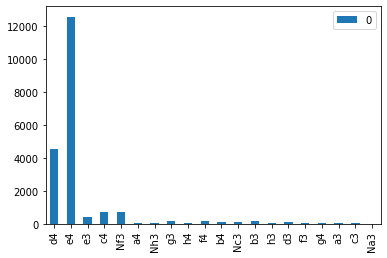

In [5]:
df.plot(kind='bar')

In [6]:
#find winning percentage for each first move
move = []
move_count = []
win_total = []

move.append(game_moves[0][0])
move_count.append(1)
if(winner[0]=='white'):
    win_total.append(1)
else:
    win_total.append(0)

for i in range(1, 20058):
    found = False
    for j in range(0, len(move)):
        if(game_moves[i][0] == move[j]):
            found = True
            move_count[j] = move_count[j] + 1
            if(winner[i]=='white'):
                win_total[j] = win_total[j] + 1
    if(found == False):
        move.append(game_moves[i][0])
        move_count.append(1)
        if(winner[i]=='white'):
            win_total.append(1)
        else:
            win_total.append(0)

for i in range(1, len(win_total)):   
    print(move[i], move_count[i], format(win_total[i]*100/move_count[i], "^-05.2f"))

e4 12598 50.57
e3 416 34.13
c4 716 53.49
Nf3 725 51.45
a4 28 32.14
Nh3 15 60.00
g3 186 45.70
h4 33 18.18
f4 166 40.96
b4 88 54.55
Nc3 99 42.42
b3 173 47.40
h3 14 50.00
d3 131 38.17
f3 23 34.78
g4 38 28.95
a3 27 62.96
c3 56 55.36
Na3 4 25.00


In [7]:
#Plot a histogram of second moves across games

second_moves = []

for i in range(0, 20058):
    if(i!=1946 and i!=1977 and i!=4115 and i!=4473 and i!=4828 and i!=5496 and i!=5875 and i!=6040 and i!=9229 and i!=11742 and i!=11963 and i!=12679 and i!=13557 and i!=13560 and i!=13701 and i!=14117 and i!=15007 and i!=18583 and i!=20057):
        second_moves.append(game_moves[i][1])

letter_counts = Counter(second_moves)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
print(df)

        0
d5   3666
Nc6   392
e5   6988
c5   2883
e6   2083
g6    387
Nf6  1693
f5    166
d6    543
c6    734
h5     24
h6     19
a6     50
b6    286
b5     25
f6     41
Nh6    12
g5     18
a5     23
Na6     6


In [13]:
rating = data_df["white_rating"]
brating = data_df["black_rating"]

adv = []
sum = 0

for i in range(0, 20058):
    if(i!=1946 and i!=1977 and i!=4115 and i!=4473 and i!=4828 and i!=5496 and i!=5875 and i!=6040 and i!=9229 and i!=11742 and i!=11963 and i!=12679 and i!=13557 and i!=13560 and i!=13701 and i!=14117 and i!=15007 and i!=18583 and i!=20057):
        adv.append(rating[i] - brating[i])
        sum = sum + (rating[i] - brating[i])

print(sum/len(adv))

7.3706771794999755


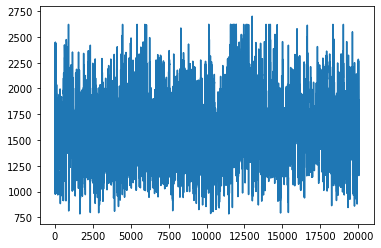

In [16]:
plt.plot(rating)

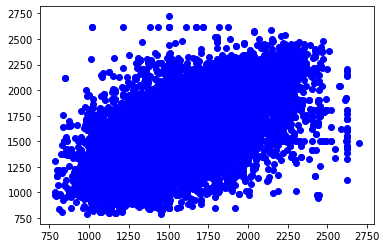

In [17]:
plt.scatter(rating, brating, c='b')

In [28]:
# Import the `pandas` library as `pd`
import pandas as pd
import json

# Load in the data with `read_csv()`
#chess = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

# Open the JSON file
f = open('chess-games.json',)
 
# returns JSON object as a dictionary
chess = json.load(f)

# Print out JSON file keys
print(chess.keys())

# Print out the keys to the data
print(chess['keys'])

dict_keys(['data', 'keys', 'DESCR'])
['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'winner', 'increment_code', 'white_id', 'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply']


In [29]:
# Print out one game's data
print(chess['data'][3])

# Print out the description of the `chess` data
print(chess['DESCR'])

# Print out the game IDs
print([row[0] for row in chess['data']])

# Print out all the data
#print(chess['data'])


[3, 'TRUE', 1504110000000.0, 1504110000000.0, 61, 'mate', 'white', '20+0', 'daniamurashov', 1439, 'adivanov2009', 1454, 'd4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O-O O-O-O Nb5 Nb4 Rc1 Nxa2 Ra1 Nb4 Nxa7+ Kb8 Nb5 Bxc2 Bxc7+ Kc8 Qd2 Qc6 Na7+ Kd7 Nxc6 bxc6 Bxd8 Kxd8 Qxb4 e5 Qb8+ Ke7 dxe5 Be4 Ra7+ Ke6 Qe8+ Kf5 Qxf7+ Nf6 Nh4+ Kg5 g3 Ng4 Qf4+ Kh5 Qxg4+ Kh6 Qf4+ g5 Qf6+ Bg6 Nxg6 Bg7 Qxg7#', 'D02', "Queen's Pawn Game: Zukertort Variation", 3]
Chess Moves
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 

In [74]:
# Alternatively load in the data with `read_csv()`
#chess = pd.read_csv("chess-games.csv", header=None)


In [30]:
# Inspect the shape
print(len(chess['data']), len(chess['data'][0]))

20058 16


In [37]:
#encode column 1 to integer

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
col_1 = [row[1] for row in chess['data']]
set_col_1 = list(set(col_1))
le.fit(col_1)
dict(zip(set_col_1, le.transform(set_col_1)))

{'FALSE': 0, 'TRUE': 1}

In [38]:
#verify the result for columm 1 has worked

le.transform([row[1] for row in chess['data']])

array([0, 1, 1, ..., 1, 1, 1])

In [39]:
#encode column 5 to integer

col_5 = [row[5] for row in chess['data']]
set_col_5 = list(set(col_5))
le.fit(col_5)
dict(zip(set_col_5, le.transform(set_col_5)))

{'outoftime': 2, 'draw': 0, 'mate': 1, 'resign': 3}

In [40]:
#encode column 6 to integer

col_6 = [row[6] for row in chess['data']]
set_col_6 = list(set(col_6))
le.fit(col_6)
dict(zip(set_col_6, le.transform(set_col_6)))

{'white': 2, 'black': 0, 'draw': 1}

In [41]:
#encode column 7 to integer

col_7 = [row[7] for row in chess['data']]
set_col_7 = list(set(col_7))
le.fit(col_7)
dict(zip(set_col_7, le.transform(set_col_7)))

{'180+5': 165,
 '16+7': 136,
 '45+10': 290,
 '20+60': 205,
 '20+3': 199,
 '16+2': 132,
 '20+8': 207,
 '8+3': 370,
 '30+9': 258,
 '7+6': 357,
 '14+0': 88,
 '60+13': 333,
 '40+0': 277,
 '60+20': 336,
 '1+19': 14,
 '10+7': 40,
 '10+15': 26,
 '60+5': 341,
 '5+8': 315,
 '5+20': 306,
 '6+10': 317,
 '0+180': 4,
 '5+9': 316,
 '19+18': 170,
 '11+7': 51,
 '18+15': 152,
 '10+25': 30,
 '5+14': 302,
 '9+15': 384,
 '0+15': 2,
 '8+8': 377,
 '9+10': 381,
 '3+9': 235,
 '12+12': 58,
 '45+1': 289,
 '45+45': 295,
 '40+15': 280,
 '60+0': 329,
 '60+7': 343,
 '1+45': 18,
 '35+3': 264,
 '180+60': 166,
 '1+13': 11,
 '35+8': 266,
 '11+11': 46,
 '19+4': 176,
 '20+25': 198,
 '20+6': 204,
 '17+5': 147,
 '10+60': 39,
 '14+10': 90,
 '30+45': 252,
 '13+20': 83,
 '25+30': 221,
 '10+20': 29,
 '7+2': 350,
 '60+3': 337,
 '40+9': 287,
 '12+11': 57,
 '15+11': 105,
 '13+3': 84,
 '6+3': 321,
 '15+3': 113,
 '17+2': 145,
 '11+1': 44,
 '4+9': 276,
 '30+15': 241,
 '6+7': 326,
 '20+2': 196,
 '11+4': 49,
 '20+15': 194,
 '20+120': 

In [42]:
#encode column 8 to integer

col_8 = [row[8] for row in chess['data']]
set_col_8 = list(set(col_8))
le.fit(col_8)
dict(zip(set_col_8, le.transform(set_col_8)))

{'sapo17': 7397,
 '1111112222': 5,
 'kmor': 4587,
 'loaiiii': 4942,
 'duelistone': 2425,
 'grandmasterreturn': 3294,
 'lovecaissa': 4994,
 'sonicj01': 7888,
 'rec0rd': 6960,
 'torri_tentori': 8520,
 'redevening': 6968,
 'tututyalo': 8644,
 'abdallah993': 46,
 'enthusiast': 2657,
 'vares': 8787,
 'nastygrapefruit': 5947,
 'saladrocket': 7324,
 'master22ar': 5330,
 'hawk2016': 3499,
 'sashmunel': 7419,
 'pikeyboy': 6602,
 'pulson2011': 6766,
 'matan_13': 5349,
 'praveenhudgi': 6730,
 'navin': 5959,
 'arnomass': 755,
 'roman-belgorod31rus': 7156,
 'reza_58': 7029,
 'podgur': 6662,
 'gmilopes': 3212,
 'matador7': 5348,
 'ehsan_master': 2531,
 'egidiano': 2519,
 'azimut818': 927,
 'shisherr': 7664,
 'as1973': 807,
 '1240100948': 6,
 'chessfrois': 1662,
 'bilel16': 1155,
 'khtabkhmal': 4480,
 'sbasari': 7444,
 'dadt505': 1997,
 'fil40': 2882,
 'rajan9473139431': 6866,
 'nickatikatom': 6023,
 'godschild': 3225,
 'bortemerr': 1280,
 'dylangaming1': 2446,
 'kentt': 4448,
 'raspoutine250': 6921,

In [44]:
#encode column 10 to integer

col_10 = [row[10] for row in chess['data']]
set_col_10 = list(set(col_10))
le.fit(col_10)
dict(zip(set_col_10, le.transform(set_col_10)))

{'1111112222': 3,
 'duelistone': 2479,
 'fjodo': 2988,
 'grandmasterreturn': 3424,
 'fillip': 2961,
 'pp82': 6765,
 'ardiansyah_vr46': 704,
 'torri_tentori': 8445,
 'redevening': 7028,
 'samiraghorbani': 7392,
 'tututyalo': 8552,
 'x__gandalf__x': 9053,
 'abdallah993': 48,
 'deepakuk': 2179,
 'enthusiast': 2711,
 'vares': 8694,
 'ercazzaro': 2724,
 'saladrocket': 7360,
 'crac': 1926,
 'metaxas': 5590,
 'bigpawn16': 1176,
 'master22ar': 5423,
 'rvm': 7304,
 'spaiva': 7885,
 'arnomass': 744,
 'nathanielwalpole': 6008,
 'wesleytonini': 8950,
 'reza_58': 7086,
 'gomentalgobloody': 3381,
 'marco1986': 5319,
 '1240100948': 4,
 'zezo86': 9263,
 'bilel16': 1183,
 'mikijvc99': 5656,
 'dadt505': 2016,
 'platonovich': 6686,
 'dylangaming1': 2506,
 'anonidark': 610,
 'kentt': 4545,
 'ja45': 4013,
 'jonastann': 4248,
 'bartolomi': 1003,
 'tornade': 8440,
 'john465': 4229,
 'bababird': 932,
 'e6d4': 2514,
 'lcf64': 4890,
 'mg196893': 5594,
 'tolia': 8394,
 'maxx38': 5499,
 'arsib8989': 758,
 'fandm-

In [45]:
#encode column 12 to integer

col_12 = [row[12] for row in chess['data']]
set_col_12 = list(set(col_12))
le.fit(col_12)
dict(zip(set_col_12, le.transform(set_col_12)))

{'Nh3 Nf6 e3 e5 a4 Nc6 a5 d5 f4 Bf5 a6 Bc5 axb7 Bb4 bxa8=Q Qxa8 Bb5 Bg4 Bxc6+ Ke7 Bxa8 Bxd1 Bc6 Bxc2 Rxa7 Bxb1 Rxc7+ Ke6 Bd7+ Ke7 Bc6+ Kf8 Rc8+ Ke7 Rxh8 Bc2 Re8+ Kd6 Rc8 e4 Ng5 Bd1 Kxd1 Bxd2 Bxd2 Ng4 Nxf7+ Ke6 Rc7 Nxe3+ Bxe3 h5 Rf1 h4 f5+ Kf6 Bg5#': 753,
 'e4 e5 Nf3 Qf6 b3 d5 d3 d4 Bb2 Bb4+ c3 dxc3 Nxc3 Nh6 h3 Qc6 Qc2 f5 Nxe5 Qb6 O-O-O fxe4 Nd5 Qd6 Nxc7+ Kd8 Nxa8 Na6 Nc4 Qf4+ Kb1 Bf5 dxe4+ Bd7 Bxg7 Re8 Qd3 Re7 f3 Ke8 Bxh6 Qxh6 g4 Nc5 Qd5 Qc6 Qg8#': 15087,
 'Nh3 e5 g3 d5 Bg2 c6 O-O Be7 e3 Nf6 f4 Bg4 Qe1 e4 d4 exd3 cxd3 O-O Nf2 Bd7 Nc3 Na6 e4 dxe4 dxe4 Nb4 Qd2 Qb6 Qe3 Bc5 Qe2 Bg4 Bf3 Bxf3 Qxf3 Nc2 Rb1 Rad8 Na4 Bxf2+ Rxf2 Qd4 Qb3 Nxe4 Qxc2 Nxf2 Qxf2 Qxa4': 761,
 'd4 d5 c4 e6 Nc3 Nf6 Nf3 b6 e3 Be7 Be2 O-O Bd2 Bb7 Rc1 dxc4 Bxc4 c5 O-O Nd5 Re1 Nxc3 Bxc3 cxd4 Nxd4 Nc6 Qg4 Nxd4 Bxd4 Bf6 Red1 Bxd4 Rxd4 Qe7 Rcd1 Rfd8 Bb3 Rxd4 Qxd4 Qg5 e4 Rc8 f4 Qc5 Qxc5 bxc5 Bc2 Kf8 Kf2 Ke7 Ke3 h6 g3 Ba6 Rc1 Rb8 Rb1 Bc4 b3 Ba6 h4 Rd8 Rc1 c4 b4 Bb7 Bb1': 4926,
 'e4 c5 Qh5 Nc6 Qxc5 e6 Qc3 Bb4 Qf3 Ne5 Qb3 Bc5 c3 Nf

In [46]:
#encode column 13 to integer

col_13 = [row[13] for row in chess['data']]
set_col_13 = list(set(col_13))
le.fit(col_13)
dict(zip(set_col_13, le.transform(set_col_13)))

{'A80': 61,
 'C03': 155,
 'C29': 180,
 'C60': 211,
 'A57': 52,
 'A23': 22,
 'A99': 70,
 'A30': 28,
 'C91': 236,
 'E44': 331,
 'E03': 309,
 'B72': 129,
 'A11': 11,
 'E60': 342,
 'A13': 13,
 'A22': 21,
 'B91': 145,
 'A36': 33,
 'C20': 171,
 'E68': 347,
 'D56': 285,
 'A49': 45,
 'B88': 143,
 'D21': 259,
 'D48': 279,
 'C25': 176,
 'A59': 54,
 'E61': 343,
 'D94': 305,
 'E95': 362,
 'D74': 291,
 'C42': 193,
 'B58': 124,
 'E54': 339,
 'B84': 140,
 'B94': 148,
 'C14': 166,
 'D38': 271,
 'A56': 51,
 'A00': 0,
 'E81': 355,
 'A03': 3,
 'C21': 172,
 'C01': 153,
 'B93': 147,
 'B19': 89,
 'E24': 321,
 'C11': 163,
 'C59': 210,
 'A06': 6,
 'C62': 213,
 'D35': 268,
 'E72': 350,
 'B38': 106,
 'B03': 74,
 'D07': 246,
 'A85': 66,
 'B70': 127,
 'B33': 102,
 'D34': 267,
 'B12': 83,
 'E87': 356,
 'C77': 226,
 'B77': 134,
 'D55': 284,
 'B73': 130,
 'B51': 118,
 'B92': 146,
 'D53': 283,
 'C54': 205,
 'C72': 223,
 'B87': 142,
 'C49': 200,
 'A43': 39,
 'A41': 37,
 'D50': 280,
 'C09': 161,
 'E71': 349,
 'D59': 28

In [47]:
#encode column 14 to integer

col_14 = [row[14] for row in chess['data']]
set_col_14 = list(set(col_14))
le.fit(col_14)
dict(zip(set_col_14, le.transform(set_col_14)))

{'Rubinstein Opening': 1011,
 'Four Knights Game: Gunsberg Variation': 295,
 'English Opening: Symmetrical Variation | Anti-Benoni Variation': 270,
 'Four Knights Game: Spanish Variation | Symmetrical Variation #3': 308,
 "King's Gambit Accepted | Modern Defense": 558,
 'Four Knights Game: Rubinstein Countergambit | Henneberger Variation': 300,
 'Pirc Defense: Classical Variation #2': 820,
 'Nimzo-Larsen Attack: Modern Variation #3': 741,
 "Queen's Pawn Game: Veresov Attack | Boyce Defense": 987,
 'Sicilian Defense: Scheveningen Variation | Classical Variation': 1341,
 'English Opening: Symmetrical Variation | Four Knights Variation': 275,
 'Italian Game: Scotch Gambit Declined #2': 506,
 'Sicilian Defense: Alapin Variation | Barmen Defense': 1203,
 'Nimzo-Indian Defense: Reshevsky Variation': 728,
 'Caro-Kann Defense: Advance Variation': 117,
 'Sicilian Defense: Paulsen Variation': 1328,
 'Sicilian Defense: Kveinis Variation': 1274,
 'Indian Game: London System': 449,
 "Queen's Pawn G

In [51]:
from sklearn.model_selection import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(chess['data'], [row[0] for row in chess['data']], [row[12][0] for row in chess['data']], test_size=0.25, random_state=42)

#print training set shape
print(len(X_train), len(X_train[0]))

#print test set shape
print(len(X_test), len(X_test[0]))

15043 16
5015 16


In [52]:
# Number of training samples
n_samples = len(X_train)

# Number of training features
n_features = len(X_train[0])

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))

# Inspect `y_train`
print(len(y_train))

15043
16
15043


In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
print(clf)

RandomForestClassifier()


In [54]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(min_impurity_split=1e-07, n_estimators=10, n_jobs=1)

In [55]:
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'TRUE'

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)